In [10]:
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import lhapdf
%matplotlib inline

In [3]:
pdf= 'NNPDF30_nlo_as_0118'
p = lhapdf.mkPDFs(pdf)
fl = ['Gluon','Singlet','V','V3','V8','T3','T8']

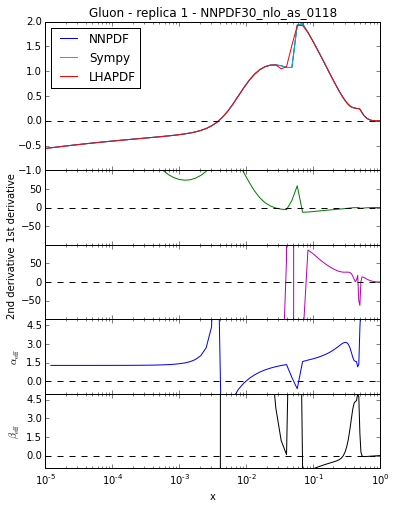

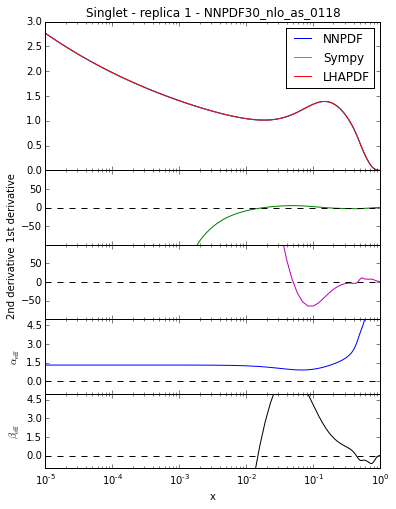

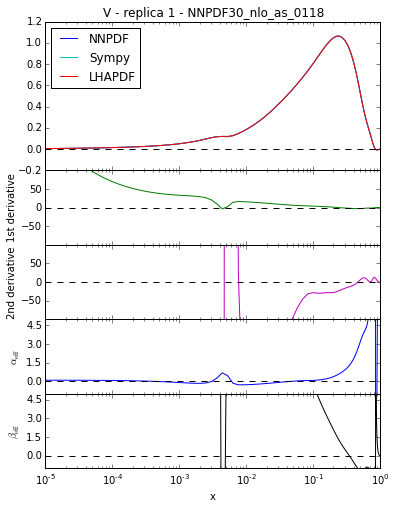

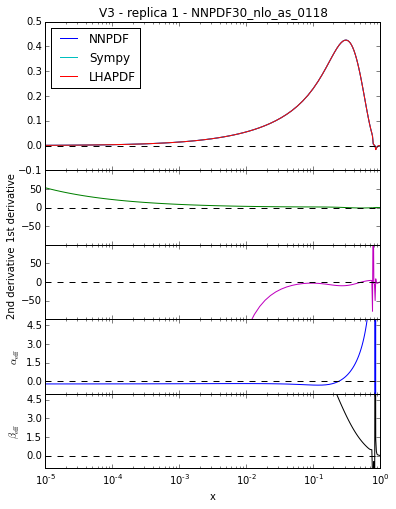

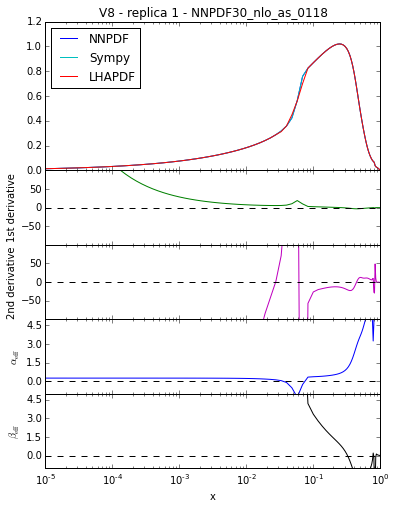

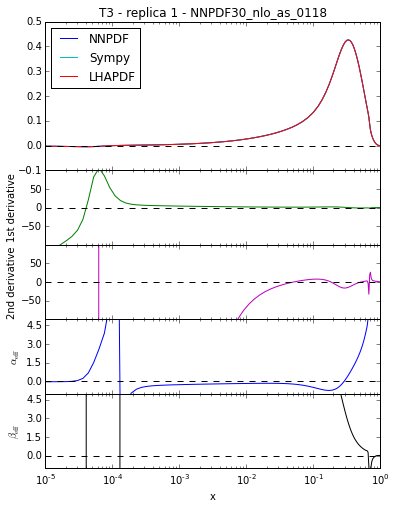

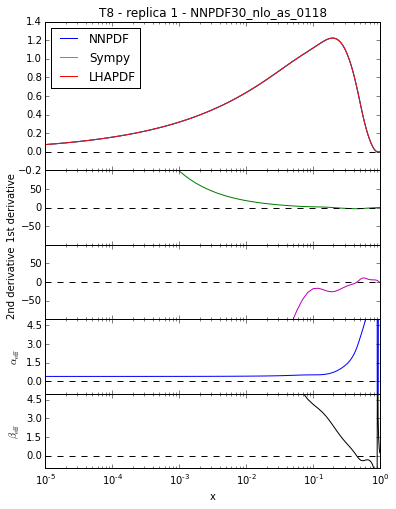

In [19]:
for ifl in fl:
    f = plt.figure()
    for irep in range(1,len(p)):
        
        f = plt.figure(figsize=(6,8))
        axs = []
        axs.append(plt.subplot2grid((6,1), (0,0), rowspan=2))
        axs[0].set_xscale('log')    
    
        axs.append(plt.subplot2grid((6,1), (2,0), sharex=axs[0]))
        axs.append(plt.subplot2grid((6,1), (3,0), sharex=axs[0]))
        axs.append(plt.subplot2grid((6,1), (4,0), sharex=axs[0]))
        axs.append(plt.subplot2grid((6,1), (5,0), sharex=axs[0]))        
        
        data = np.loadtxt(pdf + '_' + str(irep) + '_' + ifl+ '.dat')
        zero = [ 0.0 for i in range(len(data[:,0]))]

        axs[0].plot(data[:,0],data[:,1],'b', label='NNPDF')
        axs[0].plot(data[:,0],data[:,2],'c', label='Sympy')
        axs[0].plot(data[:,0],data[:,3],'r', label='LHAPDF')
        axs[1].plot(data[:,0],data[:,4],'g', label='xfx 1st derivative')
        axs[2].plot(data[:,0],data[:,5],'m', label='xfx 2nd derivative')                
        axs[3].plot(data[:,0],data[:,6],'b', label='$\alpha_{\rm eff}$')        
        axs[4].plot(data[:,0],data[:,7],'k', label='$\beta_{\rm eff}$')
        
        axs[0].plot(data[:,0],zero,'k--')
        axs[1].plot(data[:,0],zero,'k--')
        axs[2].plot(data[:,0],zero,'k--')
        axs[3].plot(data[:,0],zero,'k--')
        axs[4].plot(data[:,0],zero,'k--')
            
        axs[0].set_title(ifl + " - replica " + str(irep) + ' - ' + pdf)
        axs[0].legend(loc='best')

        axs[4].set_xlabel('x')
        axs[0].set_xlim([data[0,0],1])
        axs[1].set_ylim([-1e2,1e2])
        axs[2].set_ylim([-1e2,1e2])
        axs[3].set_ylim([-1,5])
        axs[4].set_ylim([-1,5])
        
          
        axs[1].yaxis.set_major_locator(MaxNLocator(nbins=5, prune="both"))
        axs[2].yaxis.set_major_locator(MaxNLocator(nbins=5, prune="both"))
        axs[3].yaxis.set_major_locator(MaxNLocator(nbins=5, prune="both"))
        axs[4].yaxis.set_major_locator(MaxNLocator(nbins=5, prune="both"))
        
        axs[1].set_ylabel('1st derivative')
        axs[2].set_ylabel('2nd derivative')
        axs[3].set_ylabel(r'$\alpha_{\rm eff}$')
        axs[4].set_ylabel(r'$\beta_{\rm eff}$')
        
        
        f.subplots_adjust(hspace=0)   
        plt.setp(axs[0].get_xticklabels(), visible=False)
        plt.setp(axs[1].get_xticklabels(), visible=False)    
        plt.setp(axs[2].get_xticklabels(), visible=False)    
        plt.setp(axs[3].get_xticklabels(), visible=False)            
        #f.savefig(ifl + "_replica" + str(irep) + '_' + pdf + ".pdf")